# Demonstrate that PIBT only works when there are simple cycles for agent displacement

In [1]:
import numpy as np
import sys
sys.path.append('../')
from panav.environment.env import DefaultEmtpyEnv
from panav.hybrid import HybridGraph
from panav.environment.region import Box2DRegion

from panav.viz import draw_env,draw_hybrid

%load_ext autoreload
%autoreload 2

Constructing environment
Plotting environment


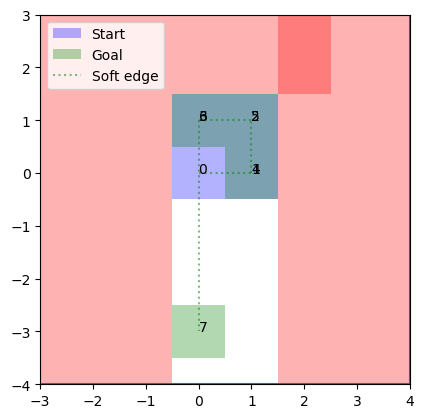

In [2]:
print('Constructing environment')
limits = [(-3,4),(-4,3)]
env = DefaultEmtpyEnv(limits=limits,N_agent = 2)
obs = []

obs.append(Box2DRegion([-3,2.5],(1.5,3)))

obs.append(Box2DRegion([-3,-0.5],[-4,1.5]))

obs.append(Box2DRegion([1.5,4],[-4,3]))

env.obstacles = obs

env.starts = np.array([[0.0,0],
                       [1.0,0],
                       [1,1],
                       [0,1],
                     ])


env.goals = np.array([
                      env.starts[1,:],
                      env.starts[2,:],
                      env.starts[3,:],

                      [0,-3.0]])
env.calc_start_goal_regions()
print('Plotting environment')

HG = HybridGraph(env,agent_radius=0.5,tunnels=[])
draw_hybrid(HG,display_soft=True)

In [7]:
from panav.PIBT import PIBT_plan
bloating_r = 0.45
vmax = 1.0
TIMEOUT = 30
plans = PIBT_plan(HG,vmax,bloating_r,TIMEOUT,max_iter=100,tau=0.5,exec_tau=0.5,exhaustive_search=False)

################# Time step 0 ################
Remaining agents 4
################# Time step 1 ################
Remaining agents 4
Children {c} invalid
Children {c} invalid
Potential deadlock 2
Deadlock resolved at theta= 1.5707963267948966
################# Time step 2 ################
Remaining agents 4
Children {c} invalid
Children {c} invalid
################# Time step 3 ################
Remaining agents 4
Children {c} invalid
Children {c} invalid
################# Time step 4 ################
Remaining agents 4
Children {c} invalid
################# Time step 5 ################
Remaining agents 4
Children {c} invalid
################# Time step 6 ################
Remaining agents 4
################# Time step 7 ################
Remaining agents 4
################# Time step 8 ################
Remaining agents 3
################# Time step 9 ################
Remaining agents 3
Potential deadlock 0
Deadlock resolved at theta= 0.7853981633974483
Potential deadlock 1
Deadlock resolv

/Users/tianpengzhang/opt/miniconda3/envs/PA-NAV/lib/python3.11/site-packages/cvxpy/problems/problem.py:1391: UserWarning: 
    The problem is either infeasible or unbounded, but the solver
    cannot tell which. Disable any solver-specific presolve methods
    and re-solve to determine the precise problem status.

    For GUROBI and CPLEX you can automatically perform this re-solve
    with the keyword argument prob.solve(reoptimize=True, ...).
    
  warnings.warn(INF_OR_UNB_MESSAGE)


In [8]:
from matplotlib import pyplot as plt
from panav.viz import animation
from IPython.display import HTML, display
from matplotlib import rcParams

exec_tau = 1.0

rcParams['animation.embed_limit'] = 2**128
dt = exec_tau * 0.25
agents = range(len(plans))
pos_to_ani = [np.array(plans[a][1]) for a in agents]
anim = animation(env, pos_to_ani, bloating_r, dt = dt)
display(HTML(anim.to_jshtml()))
plt.close() 